Train Samples: 28200
Validation Samples: 4884


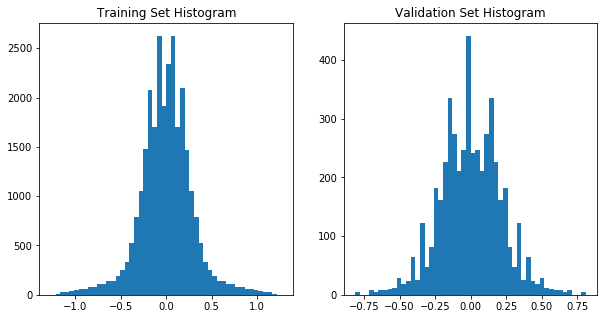

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2

from data import Sample, load_samples, augment_samples, balance_samples

# Visualizations will be shown in the notebook.
%matplotlib inline

samples_train = load_samples("data_train")
samples_val = load_samples("data_val")

augment_samples(samples_train)
balance_samples(samples_train)
balance_samples(samples_val)

print("Train Samples: {}".format(len(samples_train)))
print("Validation Samples: {}".format(len(samples_val)))

st_train = []
for sample in samples_train:
    st_train.append(sample.get_steering())

st_val = []
for sample in samples_val:
    st_val.append(sample.get_steering())
    
fig = plt.figure(figsize=(10,5))
a=fig.add_subplot(1,2,1)
a.hist(st_train, 50, normed=0)
a.set_title("Training Set Histogram")
a=fig.add_subplot(1,2,2)
a.hist(st_val, 50, normed=0)
a.set_title("Validation Set Histogram")

plt.show()

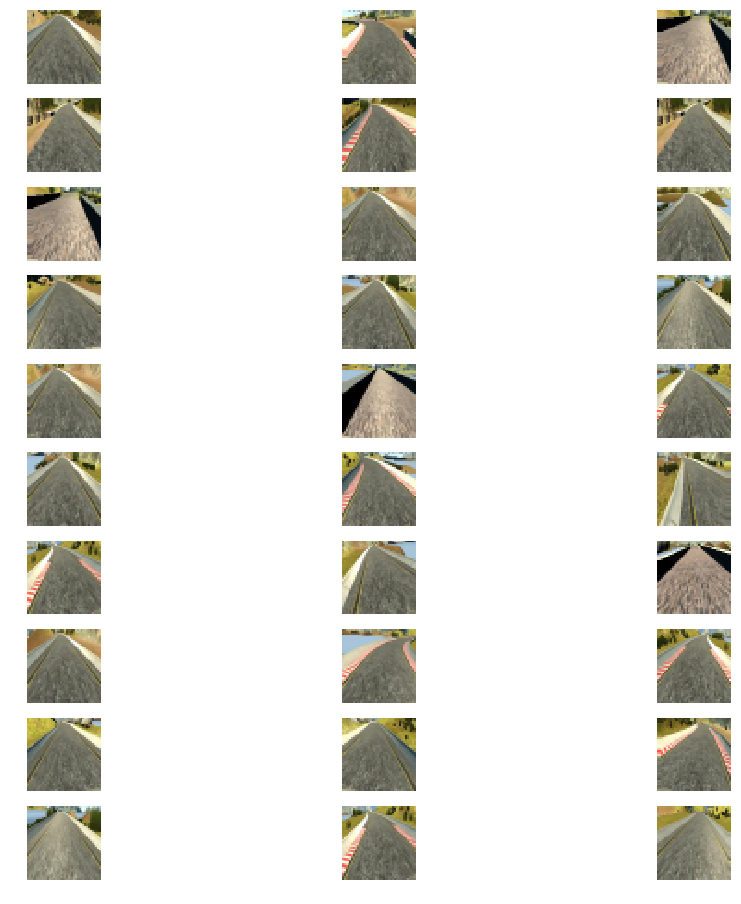

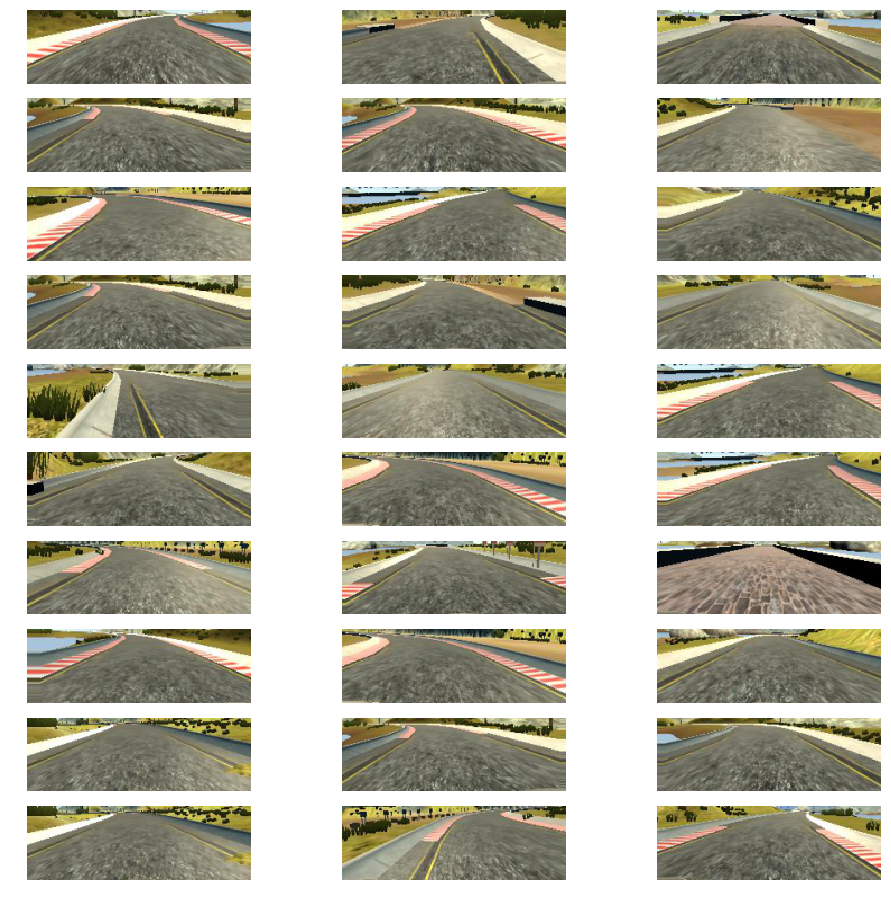

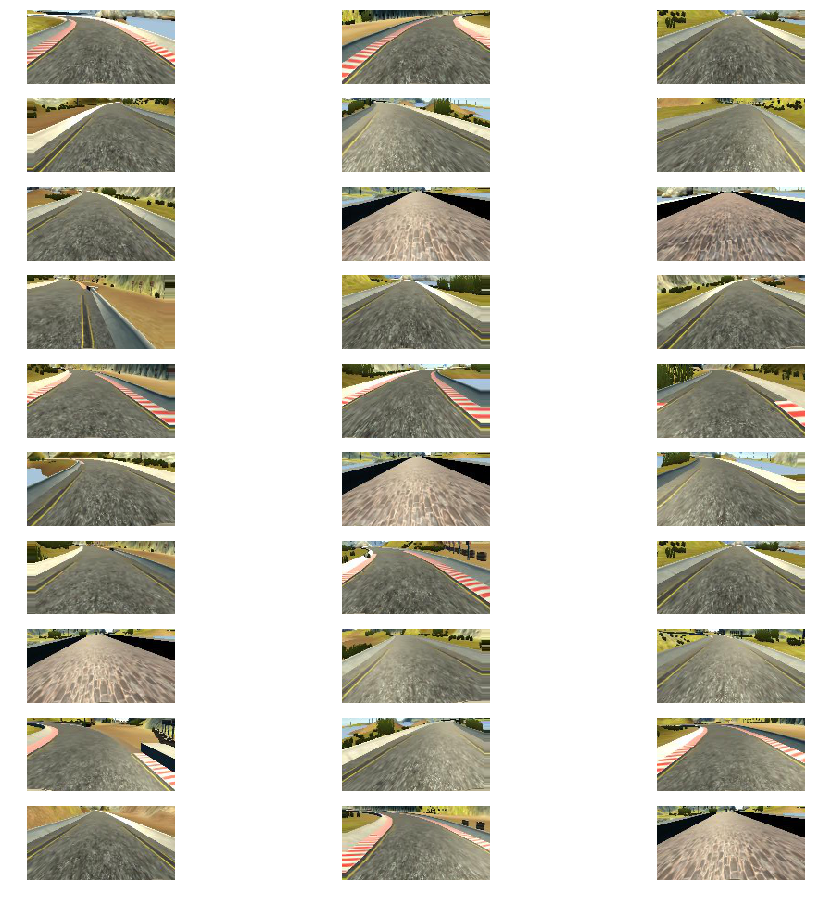

In [9]:
from model import generator

def plot_random_images(images):
    fig, axes = plt.subplots(10,3, figsize=(16,16))
    
    for i , ax in enumerate(axes.flat):
        image = random.choice(images)
        y, x, c = image.shape
        ax.set_axis_off()
        imgplot = ax.imshow(image)
        
    plt.show()

for X_simple, y_simple in generator(samples_train, 128, (40,40,3)):
    plot_random_images(X_simple)
    break
    
for X_nvidia, y_nvidia in generator(samples_train, 128, (66,200,3)):
    plot_random_images(X_nvidia)
    break
    
for X_comma, y_comma in generator(samples_train, 128, (80,160,3)):
    plot_random_images(X_comma)
    break